## KINESSO Datascientist Python Task

### Toy Sales Prediction - Regression Model

In [ ]:
__author__ = "Unnimaya Balachandran"
__email__ = "unnimayabudayam@gmail.com"

#### Task 1 : Import the sales data into Python

In [23]:
#import pandas library
import pandas as pd
#import numpy library
import numpy as np
#import the excel file toy_sales_data
df = pd.read_excel("toy_sales_data.xlsx")
#Check the structure of the data
df.head()

,month,sales,tv_spend,digital_spend,trend,xmas
0,2016-01-01,3700000,600000.0,300000.0,1,0
1,2016-02-01,8900000,2880000.0,90000.0,2,0
2,2016-03-01,8200000,864000.0,427000.0,3,0
3,2016-04-01,5800000,259200.0,128100.0,4,0
4,2016-05-01,11000000,2077760.0,538430.0,5,0


In [24]:
df.shape

(24, 6)

In [9]:
#To understand length and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   month          24 non-null     datetime64[ns]
 1   sales          24 non-null     int64         
 2   tv_spend       24 non-null     float64       
 3   digital_spend  24 non-null     float64       
 4   trend          24 non-null     int64         
 5   xmas           24 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 1.2 KB


In [11]:
#To check if any values are missing
df.isnull().sum()

month            0
sales            0
tv_spend         0
digital_spend    0
trend            0
xmas             0
dtype: int64

From the above analysis, it is clear that toy sales data is small and clean

#### Task 2: Create a plot of sales, TV investment and Digital investment in the y axis with time in the x axis### 

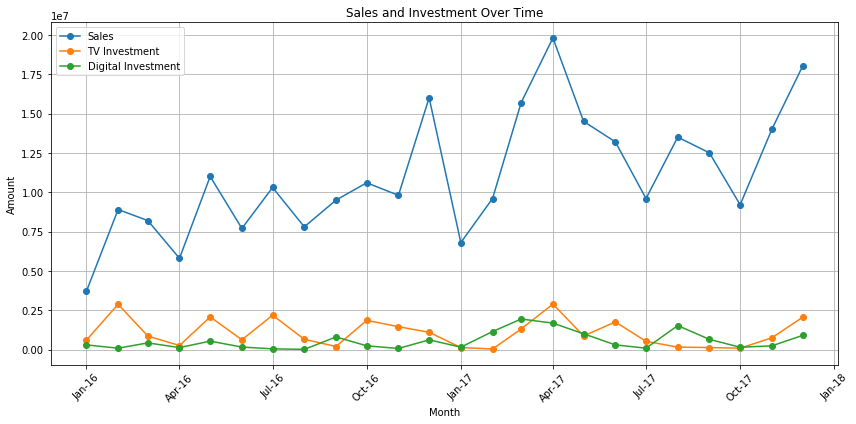

In [15]:
#Import matplotlib library to create visualisations
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Convert 'month' to datetime
try:
    df['month'] = pd.to_datetime(df['month'], format='%b-%y')
except ValueError as e:
    print("Error converting 'month' column to datetime: ", e)

# Plotting
plt.figure(figsize=(12, 6), facecolor='white')
plt.plot(df['month'], df['sales'], label='Sales', marker='o')
plt.plot(df['month'], df['tv_spend'], label='TV Investment', marker='o')
plt.plot(df['month'], df['digital_spend'], label='Digital Investment', marker='o')

# Formatting the plot for better clarity
plt.gca().xaxis.set_major_formatter(DateFormatter('%b-%y'))
plt.xticks(rotation=45)
plt.title('Sales and Investment Over Time')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Task 3 : Report the correlations among sales, TV and Digital investment 

From the data we can see that:
* sales is the dependent variable (Label)
* TV spend and digital spend are independent variables (Features)

In [16]:
# Calculate the correlation matrix
corr_matrix = df[['sales', 'tv_spend', 'digital_spend']].corr()
print(corr_matrix)

                  sales  tv_spend  digital_spend
sales          1.000000  0.440686       0.664765
tv_spend       0.440686  1.000000       0.072059
digital_spend  0.664765  0.072059       1.000000


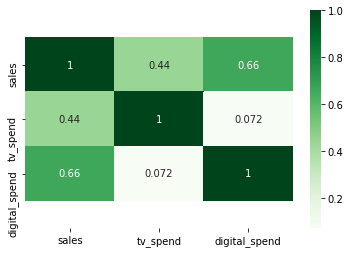

In [20]:
#Heatmap plot
import seaborn as sns
ax = sns.heatmap(df[['sales','tv_spend','digital_spend']].corr(), annot=True, cmap='Greens')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

From the above heatmap and calculated correlation matrix, we can see that:

* correlation between digital spend and sales is 0.66, which is a positive relation
* correlation between tv spend and sales is 0.44, which is a moderate positive relation

#### Task 4: Fit a regression model to data, using all data points you have available

Fitting data to a basic linear regression model and evaluating the performance of the model

In [27]:
#Import libraries required for model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data by seperating features and Target
X = df[['tv_spend', 'digital_spend']] # Independent variables
y = df['sales'] # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))#Taking square root to obtain Root mean squareed error
r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Root Mean Squared Error: 3425036.1561696175
R-squared: 0.3771923986090049


Linear Regression model has been fitted to the data with TV spend and digital spend are the features to predict the target variable Sales. Calculated two popular and common performance metrics, Root mean squared error and R-squared. Results are given below:

**Root Mean Squared Error** - 3425036.1561696175

**R-squared** - 0.3771923986090049

R-squared value indicates that approximately **37.7%** of the variability in Sales can be explained by the TV and Digital investments. In this model, RMSE is quite high which indicates that model might not predict sales accurately.

#### 4.a Report on the adjusted R-squared

In [29]:
# Calculate Adjusted R-squared
n = len(y_test)  # number of data points in the test set
k = X_test.shape[1]  # number of predictors

adjusted_r2 = 1 - (1-r2) * (n-1) / (n-k-1)
print('Adjusted R-squared:', adjusted_r2)

Adjusted R-squared: -0.24561520278199023


Adjusted R-squared for the above model is negative which indicates that model fails to predict the variability in sales.

#### 4.b Report the p-value and significance of each regressor

##### Fit a multiple linear regression model and calculate the adjusted R-squared of the model using statsmodels

In [31]:
import statsmodels.api as sm

# Adding a constant to the model for the intercept
X_train_sm = sm.add_constant(X_train)

# Fit the model using statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Get the summary of the regression
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     16.49
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           0.000130
Time:                        11:04:53   Log-Likelihood:                -303.52
No. Observations:                  19   AIC:                             613.0
Df Residuals:                      16   BIC:                             615.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.981e+06   9.46e+05      7.378

Important findings are described below:

**TV Spend:** The coefficient for TV Spend is 1.594 with a p-value of 0.012, indicating that it is statistically significant at the 5% level.

**Digital Spend:** The coefficient for Digital Spend is 4.261 with a p-value of 0.000, indicating that it is highly statistically significant.

The statsmodel explains about **67.3%** of the variability in Sales, with an **adjusted R-squared** of **63.3%**. This model appears to be a better fit and selected as final model.

#### Task 5 : Calculate the contribution from TV Spend to sales in % and absolute dollar value

In [36]:
# Calculate the mean values for TV Spend and Sales
mean_tv_spend = X_train['tv_spend'].mean()
mean_sales = y_train.mean()

# Calculate the contribution of TV Spend to Sales
contribution_tv = model_sm.params['tv_spend'] * mean_tv_spend

# Calculate the percentage contribution of TV Spend to Sales
percentage_tv = (contribution_tv / mean_sales) * 100

print('TV Spend Contribution to Sales in Dollars:', contribution_tv)
print('Percentage Contribution of TV Spend to Sales:', percentage_tv)

TV Spend Contribution to Sales in Dollars: 1860729.927538025
Percentage Contribution of TV Spend to Sales: 16.644947562722447


Contribution from TV Spend to sales are as follows:
  
**1.**  **Absolute Dollar value**  : $1,860,729.93
  
**2.**  **Percentage Contriution** : 16.64%

This indicates that TV spend contributes 16.64% to the total sales of toys

#### Task 6 : Calculate the TV return on investment (ROI)

Return on Investment(ROI) is calculated as:
    
    ROI = (Gain from Investment - Cost of Investment) / Cost of Investment

In this data, Gain from investment is same as contribution from TV spend to sales

In [38]:
#Calculating ROI
roi_tv = (contribution_tv - mean_tv_spend) / mean_tv_spend * 100

print('TV Return on Investment (ROI):', roi_tv)

TV Return on Investment (ROI): 59.395220991346


The Return on Investment (ROI) for TV Spend is approximately 59.40% and indicates that for every dollar spent on TV advertising, there is a return of about $0.59 above the initial investment.

#### Task 7 : Using the planned spend values for the first 3 months of 2018 and your regressions model, calculate the expected sales value for the first 3 months of 2018

In [39]:
planned_tv_spend = [350000,950000,1350000] 
planned_digital_spend = [215000, 150000, 400000] 

#Creating a data frame
planned_spend_df = pd.DataFrame({'tv_spend': planned_tv_spend, 'digital_spend': planned_digital_spend})

# Adding constant for the intercept
planned_spend_df_sm = sm.add_constant(planned_spend_df)

#predict sales based on the planned spend
predicted_sales = model_sm.predict(planned_spend_df_sm)

print('Predicted Sales for the first 3 months of 2018:', predicted_sales)

Predicted Sales for the first 3 months of 2018: 0    8.455028e+06
1    9.134447e+06
2    1.083723e+07
dtype: float64


As per the model, predicted sales for the January, February and March of 2018 are as follows:
    
**January** - $845,028

**February** - $9,134,447

**March** - $1,083,723

#### Task 8 : In your opinion what additional data would improve your model and why?

To improve the performance of the above model, following things should be considered:

1) **More data** : Data currently have only 25 records which does not provide enough learning cases for the regression model. Adding more data points could improve the performance and predict more accurately.

2) **Including additional features**: To predict sales, we can include additional features like marketing through other platforms like Radio, Newspaper, Magazines etc. Inclusion of other features like customer preferences, their age, demogaraphics etc can predict the sales better.
    

## Thank you